In [21949]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [21950]:
df = pd.read_excel("secont.xlsx")
df

,X1,X2,Y
0,10,10,80.0
1,1,2,85.0
2,4,4,80.0
3,8,7,81.7
4,2,2,77.5
5,7,6,80.0


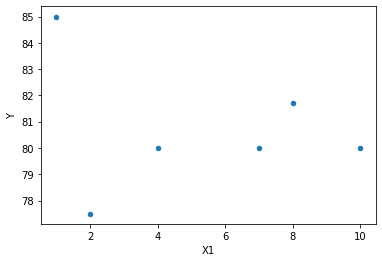

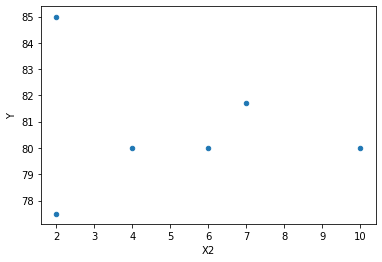

In [21951]:
df.plot.scatter(x ='X1', y = 'Y', alpha = 1)
df.plot.scatter(x ='X2', y = 'Y', alpha = 1)

Text(0.5, 0, 'Y')

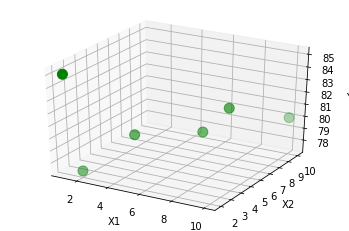

In [21952]:
x1 = df["X1"]
x2 = df["X2"]
y = df["Y"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, s =100, c = 'green')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

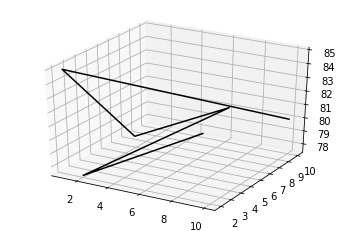

In [21953]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1, x2, y, c = 'black')

In [21954]:
x1 = np.array(x1)
x1

array([10,  1,  4,  8,  2,  7], dtype=int64)

In [21955]:
x2 = np.array(x2)
x2

array([10,  2,  4,  7,  2,  6], dtype=int64)

In [21956]:
y = np.array(y)
y

array([80. , 85. , 80. , 81.7, 77.5, 80. ])

In [21957]:
F = [[1, np.log10(x1[0])**0.2, 1/x2[0]**2]]
F

[[1, 1.0, 0.01]]

In [21958]:
for i in range(1, x1.size):
    F.append([1,  np.log10(x1[i])**0.2, 1/x2[i]**2])

In [21959]:
F = np.array(F)
F

array([[1.        , 1.        , 0.01      ],
       [1.        , 0.        , 0.25      ],
       [1.        , 0.90349958, 0.0625    ],
       [1.        , 0.97981979, 0.02040816],
       [1.        , 0.78654207, 0.25      ],
       [1.        , 0.96689969, 0.02777778]])

In [21960]:
np.shape(F)

(6, 3)

In [21961]:
Ft = F.T
Ft

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.90349958, 0.97981979, 0.78654207,
        0.96689969],
       [0.01      , 0.25      , 0.0625    , 0.02040816, 0.25      ,
        0.02777778]])

In [21962]:
np.shape(Ft)

(3, 6)

In [21963]:
A = np.dot(Ft, F)
print("A = F^t F = \n", A)

A = F^t F = 
 [[6.         4.63676111 0.62068594]
 [4.63676111 4.32990172 0.30995889]
 [0.62068594 0.30995889 0.13019435]]


In [21964]:
A1 = np.linalg.inv(A) 
print('Відповідно A^-1 = \n', A1)

Відповідно A^-1 = 
 [[  3.80788429  -3.34896161 -10.180625  ]
 [ -3.34896161   3.2237466    8.29087049]
 [-10.180625     8.29087049  36.47732709]]


In [21965]:
y

array([80. , 85. , 80. , 81.7, 77.5, 80. ])

In [21966]:
np.shape(y.T)

(6,)

In [21967]:
b = np.dot(A1, Ft)
B = np.dot(b, y)
B

array([ 90.28392196,  -9.56545882, -21.18750142])

In [21968]:
y_n = y.sum()/x1.size
y_n

80.7

In [21969]:
summ = 0
for i in y:
    summ += (i - y_n)**2
D = summ/(x1.size-1)
D

6.240000000000003

In [21970]:
summa = 0
for j in range(0, x1.size):
    summa += (y[j] - (B[0] + B[1]*np.log10(x1[j])**0.2 + B[2]*1/x2[j]**2   ))**2
G = summa/(x1.size- B.size)
G

0.6829424252821931

In [21971]:
summ2 = 0
for i in y:
    summ2 += (i - y_n)**2
summ2

31.200000000000014

In [21972]:
s1 = y - np.dot(F, B)
s = np.dot(s1.T, s1)
s

2.0488272758465795

In [21973]:
z = summ2/s
z

15.228223661317722

In [21974]:
zz = summ2/summa
zz

15.228223661317726

In [21975]:
zz*(x1.size-B.size)/(x1.size-1)

9.136934196790635

In [21976]:
9.01

9.01

In [21977]:
yfunc =[]
for j in range (0, x1.size):
    yfunc.append(B[0] + B[1]*np.log10(x1[j])**0.2 + B[2]*1/x2[j]**2 )
yfunc

[80.50658812535552,
 84.98704660562103,
 80.31731512257306,
 80.47909815148434,
 77.46341086459006,
 80.4465411303753]

In [21978]:
d = {'y':y, 'func': yfunc}

In [21979]:
dff = pd.DataFrame(data = d)
dff

,y,func
0,80.0,80.506588
1,85.0,84.987047
2,80.0,80.317315
3,81.7,80.479098
4,77.5,77.463411
5,80.0,80.446541


In [21980]:
dff['--'] = abs(dff['y'] - dff['func'])
dff

,y,func,--
0,80.0,80.506588,0.506588
1,85.0,84.987047,0.012953
2,80.0,80.317315,0.317315
3,81.7,80.479098,1.220902
4,77.5,77.463411,0.036589
5,80.0,80.446541,0.446541


In [21981]:
dff['--'].max()

1.2209018485156662

In [21982]:
15 - x1.size

9

In [21983]:
x1.size -1

5

In [21984]:
x1.size - B.size

3

In [21985]:
x

0     10
1      1
2      1
3      6
4      6
5      4
6      4
7      4
8      8
9      8
10     8
11     2
12     2
13     7
14     7
Name: X1, dtype: int64

In [21986]:
y

array([80. , 85. , 80. , 81.7, 77.5, 80. ])

In [21987]:
F[0]

array([1.  , 1.  , 0.01])

In [21988]:
x11 = np.dot(F[0], A1)

In [21989]:
x111 = np.dot(x11, F[0])
x111

0.2995603244925249